之前写过基于逻辑回归的鸢尾花分类,
这一次我们用决策树来试试分类结果

In [264]:
import sklearn.datasets
from pathlib import Path
import subprocess
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

'''加载数据集'''
iris = sklearn.datasets.load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [265]:
feature_names  = iris.feature_names
#标签有三个['setosa', 'versicolor', 'virginica'] 山鸢尾、变色鸢尾和维吉尼亚鸢尾
'''初始化数据'''
Data ,target = iris.data,iris.target
xTrain,xTest,yTrain,yTest = sklearn.model_selection.train_test_split(Data,target,test_size=0.3,random_state=7)

critertion = 'entropy' 采用信息增益的方法,优化决策树
 默认'gini
在信息增益中，衡量标准是看特征能够为分类系统带来多少信息，带来的信息越多，该特征越重要。对一个特征而言，系统有它和没它时信息量将发生变化，而前后信息量的差值就是这个特征给系统带来的信息量

Gini与Entropy的性能区别
    根据公式衍生有同：
    Gini更适合连续数值变量， 而Entropy更适合符号型变量。
    Gini降低最小误分率， 而Entropy具有更好的概率解释性。
    Gini运算要比Entropy运算快。

    但是根据实际运行情况：
    Gini， Entropy， 和Misclassification Error 基本一致， 一般不超过2%的区别。

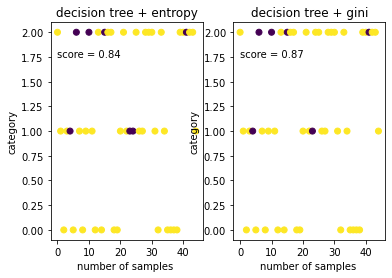

In [266]:
'''初始化树'''
dtree1 = tree.DecisionTreeClassifier(criterion='entropy')
dtree2 = tree.DecisionTreeClassifier(criterion='gini')
#
dtree1.fit(xTrain,yTrain), dtree2.fit(xTrain,yTrain)

'''预测标注'''
pre_y1 = dtree1.predict(xTest)
pre_y2 = dtree2.predict(xTest)
light1 = (pre_y1 == yTest)+0
light2 = (pre_y2 == yTest)+0
plt.subplot(121)
plt.scatter(range(len(pre_y1)),pre_y1,c= light1)
plt.title('decision tree + entropy')
plt.xlabel('number of samples ')
plt.ylabel('category')
plt.text(0,1.75,f'score = {metrics.accuracy_score(pre_y1,yTest):.2f}')
plt.subplot(122)
plt.scatter(range(len(pre_y2)),pre_y2,c= light2)
plt.title('decision tree + gini')
plt.xlabel('number of samples ')
plt.ylabel('category')
plt.text(0,1.75,f'score = {metrics.accuracy_score(pre_y2,yTest):.2f}')
plt.show()

Popen原型:
subprocess.Popen(args, bufsize=0, executable=None, stdin=None, stdout=None, stderr=None, preexec_fn=None, close_fds=False, shell=false)

参数bufsize：指定缓冲.
参数executable:用于指定可执行程序。一般情况下我们通过args参数来设置所要运行的程序。如果将参数shell设为 True，executable将指定程序使用的shell
参数stdin, stdout, stderr分别表示程序的标准输入、输出、错误句柄。他们可以是PIPE，文件描述符或文件对象，也可以设置为None，表示从父进程继承
参数stdin, stdout, stderr分别表示程序的标准输入、输出、错误句柄。他们可以是PIPE，文件描述符或文件对象，也可以设置为None，表示从父进程继承

In [269]:
'''显示生成的决策树'''
def check_valid_path(path):
    """检查文件路径是否有效，并返回以'/'分割的文件路径"""
    if '\\' in path:
        elements = str(Path(path)).split(sep='\\')
        final_path = Path('/'.join(elements))
    elif '/' in path:
        final_path = Path(path)
    else:
        if not Path(path).exists():
            raise Exception("Error: File path pattern is not correct.")
        else:
            final_path = Path(path)
    if not final_path.exists():
        raise Exception("Error: Your file path does not exist.")
    if final_path != '':
        return final_path
    else:
        return None


def dot2png(dot_file_path=None, img_path=None):
    """决策树可视化中.dot文件转化为.png图片的函数"""
    if not dot_file_path:
        raise Exception(".dot file is not given.")
    elif not dot_file_path.endswith('.dot'):
        raise Exception("file provided is not '.dot' type.")

    dot_file_path = check_valid_path(dot_file_path)

    if not img_path:
        img_path = 'Dot/dt_png.png'
    elif not img_path.endswith('.png'):
        raise Exception("image file not end with '.png'.")

    img_path = img_path

    cmd_args = 'dot'+'-Tpng'+dot_file_path+'-o'+img_path

    cmd_pro = subprocess.Popen(args=cmd_args, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
    retval = cmd_pro.stdout.read().decode('gbk')
    if retval == '':
        print("successfully create file " + img_path)
    else:
        print("The program encountered some error: ")
        print(retval)
# '''方法1，先生成dot文件，然后在cmd命令行中，
# 先到文件所在目录，再运行dot -Tpng dtree.dot -o dtree.png，得到图片'''
with open('Dot/dtree1.dot','w') as f:
    tree.export_graphviz(dtree1,f,feature_names = feature_names)

with open('Dot/dtree2.dot','w') as f:
    tree.export_graphviz(dtree2,f,feature_names = feature_names)
# '''方法2，可能有bug，未实际使用，只提供思路'''
# file_dot = "Dot/dtree.dot"
# out_png = "Dot/dtree.png"
# cmd_args = f"dot - Tpng {file_dot} -o {out_png}"
# subprocess.Popen(args = "D:")
# cmd_pro = subprocess.Popen(args=cmd_args, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
#
# '''方法三，调用封装函数'''

评估特征的重要性,也就是查看是那个特征最大限度上决定了分类

plt 画柱状图
# 纵向柱状图bar
plt.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)

# 横向柱状图barh，简单理解bar旋转90°
plt.barh(y, width, height=0.8, left=None, *, align='center', **kwargs)

plt.bar()
x：表示x坐标，数据类型为int或float类型，刻度自适应调整；也可传dataframe的object，x轴上等间距排列；
height：表示柱状图的高度，也就是y坐标值，数据类型为int或float类型；
width：表示柱状图的宽度，取值在0~1之间，默认为0.8；
bottom：柱状图的起始位置，也就是y轴的起始坐标；
align：柱状图的中心位置，默认"center"居中，可设置为"lege"边缘；
color：柱状图颜色；
edgecolor：边框颜色；
linewidth：边框宽度；
tick_label：下标标签；
log：柱状图y周使用科学计算方法，bool类型；
orientation：柱状图是竖直还是水平，竖直：“vertical”，水平条：“horizontal”；

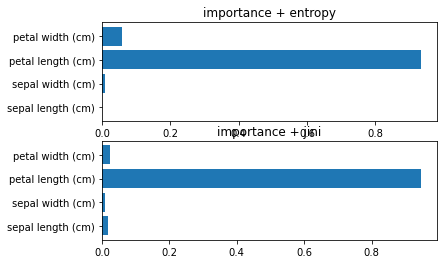

In [271]:
dtree1_importance = dtree1.feature_importances_
dtree2_importance = dtree2.feature_importances_
# 这是一个归一化的矩阵
plt.subplot(211)
plt.barh(range(4),dtree1_importance,align='center',tick_label =feature_names)
plt.title('importance + entropy')
plt.subplot(212)
plt.barh(range(4),dtree2_importance,align='center',tick_label =feature_names)
plt.title('importance + jini')
plt.show()

由上图可见,对于鸢尾花的分类,决策树主要依据 petal width 和petal length 特征来进行不同类别的区分
这个结果我们也可以在生成的dtree图中发现,depth = 0 的判断条件为petal with <= 0.8 就将45 个山鸢尾 全部分类完毕